In [20]:
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import graphviz
import os
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from sklearn import metrics
%matplotlib inline
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

In [21]:
ds_tra = pd.read_excel('/home/pirl/Desktop/data/app_transaction.xlsx',sheetname='app_transaction')
ds_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
회원코드          10000 non-null object
프로그램          10000 non-null object
상태            10000 non-null object
프로그램가격        10000 non-null int64
최종결제금액        10000 non-null int64
결제시각          10000 non-null object
결제유형          10000 non-null object
채널            10000 non-null object
보조식품가격        10000 non-null int64
보조식품(추가구매)    10000 non-null object
기기종류          10000 non-null object
기기제조사         10000 non-null object
OSversion     10000 non-null object
dtypes: int64(3), object(10)
memory usage: 1015.7+ KB


In [22]:
ds_tra.columns

Index(['회원코드', '프로그램', '상태', '프로그램가격', '최종결제금액', '결제시각', '결제유형', '채널',
       '보조식품가격', '보조식품(추가구매)', '기기종류', '기기제조사', 'OSversion'],
      dtype='object')

In [23]:
ds_tra.index

RangeIndex(start=0, stop=10000, step=1)

In [24]:
ds_tra.values

array([['Y9RY2VSI', '체중감량 프로그램 (타입B)', 'completed', ..., 'iPhone',
        'Apple', 'iOS11.4.1'],
       ['3GTN3S3B', '체중감량 프로그램 (타입B)', 'completed', ..., 'SM-N935S',
        'samsung', 'Android7.0'],
       ['6B0IG276', '체중감량 프로그램 (타입 A)', 'completed', ..., 'iPhone',
        'Apple', 'iOS12.0'],
       ...,
       ['VWJ4NLZY', '체중감량 프로그램 (타입 A)', 'completed', ..., 'iPhone',
        'Apple', 'iOS11.2.1'],
       ['NJ2PR967', '체중감량 프로그램 (타입B)', 'cancelled', ..., 'SM-G955N',
        'samsung', 'Android8.0.0'],
       ['KVX64CPM', '체중감량 프로그램 (타입 A)', 'cancelled', ..., 'SM-N960N',
        'samsung', 'Android8.1.0']], dtype=object)

In [27]:
ds_tra.head(3)

,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매),기기종류,기기제조사,OSversion
0,Y9RY2VSI,체중감량 프로그램 (타입B),completed,112500,112500,2017-04-14 오후 7:03:29.976000,Recurring,others,0,구매안함,iPhone,Apple,iOS11.4.1
1,3GTN3S3B,체중감량 프로그램 (타입B),completed,44780,44780,2017-05-23 오후 8:53:54.368000,Recurring,others,0,구매안함,SM-N935S,samsung,Android7.0
2,6B0IG276,체중감량 프로그램 (타입 A),completed,132000,149000,2017-08-23 오후 11:39:21.840000,Recurring,facebook,17000,식이요법보조제A,iPhone,Apple,iOS12.0


In [28]:
ds_tra.tail(2)

,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매),기기종류,기기제조사,OSversion
9998,NJ2PR967,체중감량 프로그램 (타입B),cancelled,112500,129500,2017-04-28 오전 7:05:19.776000,Recurring,facebook,0,구매안함,SM-G955N,samsung,Android8.0.0
9999,KVX64CPM,체중감량 프로그램 (타입 A),cancelled,112500,112500,2017-06-02 오전 10:16:34.576000,Recurring,others,0,구매안함,SM-N960N,samsung,Android8.1.0


In [31]:
ds_tra['프로그램'].head()

0     체중감량 프로그램 (타입B)
1     체중감량 프로그램 (타입B)
2    체중감량 프로그램 (타입 A)
3    체중감량 프로그램 (타입 A)
4     체중감량 프로그램 (타입B)
Name: 프로그램, dtype: object

In [30]:
ds_tra[['프로그램','결제시각']].head()

,프로그램,결제시각
0,체중감량 프로그램 (타입B),2017-04-14 오후 7:03:29.976000
1,체중감량 프로그램 (타입B),2017-05-23 오후 8:53:54.368000
2,체중감량 프로그램 (타입 A),2017-08-23 오후 11:39:21.840000
3,체중감량 프로그램 (타입 A),2017-08-28 오후 8:18:22.824000
4,체중감량 프로그램 (타입B),2017-05-07 오후 5:50:30.944000


In [32]:
a=ds_tra[['프로그램','결제시각']]
print(a.shape)
a.head()

(10000, 2)


,프로그램,결제시각
0,체중감량 프로그램 (타입B),2017-04-14 오후 7:03:29.976000
1,체중감량 프로그램 (타입B),2017-05-23 오후 8:53:54.368000
2,체중감량 프로그램 (타입 A),2017-08-23 오후 11:39:21.840000
3,체중감량 프로그램 (타입 A),2017-08-28 오후 8:18:22.824000
4,체중감량 프로그램 (타입B),2017-05-07 오후 5:50:30.944000


In [34]:
ds_tra['프로그램가격'].max()

177000

In [35]:
ds_tra['프로그램가격'].min()

44780

In [36]:
ds_tra['프로그램가격'].describe()

count     10000.000000
mean     107778.024000
std       17897.796506
min       44780.000000
25%      112500.000000
50%      112500.000000
75%      112500.000000
max      177000.000000
Name: 프로그램가격, dtype: float64

In [41]:
#99%의 값 확인
ds_tra['프로그램가격'].quantile(0.99)

132000.0

In [44]:
#오름차순 소트
ds_tra.sort_values(by='프로그램가격', ascending=False).head()

,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매),기기종류,기기제조사,OSversion
7840,458433H5,체중감량 프로그램 (타입 A),completed,177000,177000,2017-06-04 오후 10:39:42.672000,Recurring,facebook,0,구매안함,iPhone,Apple,iOS11.4.1
6525,3B91KE6E,체중감량 프로그램 (타입 A),completed,177000,194000,2017-06-03 오전 2:15:59.776000,Recurring,facebook,17000,식이요법보조제A,iPhone,Apple,iOS11.4.1
1498,QUCDJ17Y,체중감량 프로그램 (타입 A),completed,177000,177000,2017-06-05 오전 2:23:01.384000,Recurring,others,0,구매안함,SM-N950N,samsung,Android8.0.0
9373,1F1Y479Z,체중감량 프로그램 (타입 A),completed,177000,177000,2017-06-05 오전 2:33:19.384000,Recurring,others,0,구매안함,iPhone,Apple,iOS11.4.1
7911,GRYDUHGT,체중감량 프로그램 (타입 A),cancelled,177000,194000,2017-06-03 오후 12:01:26.048000,Recurring,facebook,0,구매안함,iPhone,Apple,iOS10.3.3


# 명목형 처리

In [45]:
ds_tra.columns

Index(['회원코드', '프로그램', '상태', '프로그램가격', '최종결제금액', '결제시각', '결제유형', '채널',
       '보조식품가격', '보조식품(추가구매)', '기기종류', '기기제조사', 'OSversion'],
      dtype='object')

In [46]:
ds_tra['기기종류'].unique()

array(['iPhone', 'SM-N935S', 'SM-G955N', 'SM-G930S', 'SM-G960N',
       'SM-A530N', 'LG-F800S', 'SM-T820', 'SM-G965N', 'SM-J111F',
       'SM-N910S', 'SM-N915L', 'SM-G930K', 'Mi A1', 'SM-A810S',
       'SM-G935K', 'SM-G935S', 'SM-N916K', 'SM-N920K', 'SM-A520S',
       'LM-G710N', 'SM-J530L', 'SM-A720S', 'SM-N950N', 'SM-N920S',
       'SM-G950N', 'LGM-X600L', 'SM-P580', 'SM-J730K', 'SM-N960N',
       'LGM-G600K', 'SM-N920L', 'LGM-V300K', 'LG-F700K', 'SM-N916S',
       'LG-F470K', 'SM-G920K', 'SM-G610S', 'LGM-G600L', 'SM-A600N',
       'LG-F800K', 'LG-F600L', 'Redmi Note 5', 'Mi A2', 'LGM-G600S',
       'SM-J510S', 'LG-F320K', 'SM-N900K', 'LGM-V300S', 'SM-N910L',
       'SM-G955F', 'LGM-X401S', 'SHV-E330S', 'SM-T536', 'SM-G925K',
       'SM-A700L', 'SM-J510K', 'SM-J727S', 'LG-F500L', 'SM-A510S',
       'SM-N935K', 'SM-G610L', 'SM-N916L', 'SM-G900S', 'LG-F700L',
       'SM-N935L', 'SM-G950F', 'LGM-X800L', 'LG-F800L', 'SM-A520K',
       'SM-J500N0', 'LG-F700S', 'SM-A800S', 'SM-G935L', 'T-1

In [47]:
ds_tra['기기종류'].value_counts()

iPhone          3907
SM-N950N        1025
SM-G950N         462
SM-G965N         385
SM-G960N         350
SM-G930S         282
SM-G955N         234
SM-J730K         212
SM-N920L         210
SM-N920S         209
SM-G930K         190
SM-N960N         174
SM-G935S         160
SM-N920K         130
SM-N935S         106
LM-G710N         100
LGM-V300K         95
SM-J111F          90
SM-A520S          82
SM-N935K          67
SM-A720S          61
SM-G920S          59
SM-A530N          57
SM-G850K          57
SM-P580           57
SM-T820           53
SM-N910S          51
SM-G920K          43
SM-G610S          42
LG-F800S          40
                ... 
SM-G925K           6
LGM-X401S          6
SM-G928K           6
Redmi Note 5       6
SM-N900L           6
LG-F800K           6
LM-X410L           5
iPad               5
SM-A810S           5
LGM-X800L          5
LG-F500L           5
SM-G610L           5
SM-N915L           5
SM-G611S           5
SM-N910L           4
LG-F750K           4
SM-A600N     

In [48]:
ds_tra['기기종류']=='LG-F470K'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9970    False
9971    False
9972    False
9973    False
9974    False
9975    False
9976    False
9977    False
9978    False
9979    False
9980    False
9981    False
9982    False
9983    False
9984    False
9985    False
9986    False
9987    False
9988    False
9989    False
9990    False
9991    False
9992    False
9993    False
9994    False
9995    False
9996    False
9997    False
9998    False
9999    False
Name: 기기종류, Length: 10000, dtype: bool

In [51]:
b=ds_tra[ds_tra['기기종류']=='LG-F470K']
b

,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매),기기종류,기기제조사,OSversion
754,JHDD1Q42,체중감량 프로그램 (타입B),cancelled,112500,129500,2017-05-01 오후 10:33:00.192000,Recurring,facebook,0,구매안함,LG-F470K,LGE,Android4.4.2


In [53]:
c=ds_tra[ds_tra['최종결제금액']>190000]
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1308 to 8220
Data columns (total 13 columns):
회원코드          18 non-null object
프로그램          18 non-null object
상태            18 non-null object
프로그램가격        18 non-null int64
최종결제금액        18 non-null int64
결제시각          18 non-null object
결제유형          18 non-null object
채널            18 non-null object
보조식품가격        18 non-null int64
보조식품(추가구매)    18 non-null object
기기종류          18 non-null object
기기제조사         18 non-null object
OSversion     18 non-null object
dtypes: int64(3), object(10)
memory usage: 2.0+ KB


In [55]:
ds_tra.isnull()

,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매),기기종류,기기제조사,OSversion
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
ds_tra.isnull().sum()

회원코드          0
프로그램          0
상태            0
프로그램가격        0
최종결제금액        0
결제시각          0
결제유형          0
채널            0
보조식품가격        0
보조식품(추가구매)    0
기기종류          0
기기제조사         0
OSversion     0
dtype: int64

In [57]:
import seaborn as sns

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


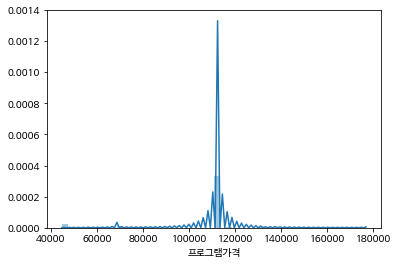

In [58]:
sns.distplot(ds_tra['프로그램가격'])

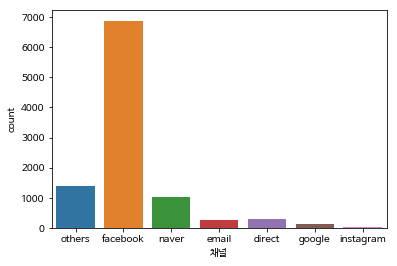

In [59]:
sns.countplot(ds_tra['채널'])

In [69]:
import matplotlib.pyplot as plt #그래프 출력시
import matplotlib as mpl #그래프 옵션


#그래프 시각화 옵션
%matplotlib inline

#그래프 한글 설정
mpl.rc('font',family="Malgun Gothic")

#그래프의 한글을 더욱 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프의 음수값이 나올때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus=False)

In [71]:
#칼럼 나오는 출력 갯수 늘리기
pd.options.display.max_columns=100

# DataFrame

In [8]:
odd=[1,3,5,7,9]

In [9]:
odd.mean()

AttributeError: 'list' object has no attribute 'mean'

In [10]:
odd=pd.Series(odd)
odd.mean()

5.0

In [16]:
transaction=[
    ['2018-02-01', 500, '확인'],
    ['2018-02-05', 700, '취소'],
    ['2018-02-06', 100, '확인']
]

In [ ]:
columns, index, values : 
    